**Projeto 1 - PNAD**



O projeto 1 de Ciencia dos Dados, teve como obejtivo analisar o banco de dados da PNAD do ponto de vista dos aposentados, se utilizando de diversas estratégias e ferramentas de análise estatística.
Minha análise sobre os aposentados basea-se em estudar como o nível de educação e a idade com o indivíduo começou a trabalhar influenciam na sua renda de como aposentado. Para isso utilizaremos as variaveis:
V6007(Curso mais elevado que frequentou anteriormente);
V9892(Idade com que comecou a trabalhar);
V4803(Anos de estudo);
V4745(Nível de intrucao mais elevado);
V1252(Rendimento mensal da aposentadoria federal);
e V1255(Rendimento de pensão da previdencia''

In [4]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import numpy as np
os.chdir ("C:\\Users\\Avell\\Desktop\\Insper\\3˚ Semestre\\Ciencia_dos_Dados_DP\\Projeto 1")

In [5]:
pnad = pd.read_csv('pes2013R.csv')

In [6]:
apos = pnad[pnad.V9122==2] #o primeiro termo filtra o dataframe deixando apenas os aposentados na variavel, o segundo transforma todos os valores NaN em nulos, de maneira a se trabalhar melhor com os mesmos.
apos.head

<bound method NDFrame.head of         Unnamed: 0  V0101  UF  V0102  V0103  V0301  V0302  V3031  V3032  \
34              35   2013  11     23      3      1      4     16      4   
74              75   2013  11     31      1      3      2      4      4   
75              76   2013  11     31      1      4      4     13     12   
87              88   2013  11     31      6      1      2     24      3   
171            172   2013  11     40     15      1      2      7     11   
186            187   2013  11     58      4      1      2      1      8   
187            188   2013  11     58      4      2      4     28     12   
206            207   2013  11     58     12      1      4      0     20   
262            263   2013  11     66     10      1      4     13      6   
312            313   2013  11     74     12      1      2     25     12   
324            325   2013  11     82      1      1      2     12      9   
325            326   2013  11     82      1      2      4      1     1

In [7]:
apos.shape

(37506, 331)

In [108]:
V6007 = pnad.V6007 #Curso mais elevado que frequentou anteriormente
V9892 = pnad.V9892 #Idade com que comecou a trabalhar
#V9124 = pnad.V9124 #Recebia normalmente rendimento que não era proveniente de trabalho 
V1251 = pnad.V1251 #Recebia rendimento de aposentado federal
#V1257 = pnad.V1257 #Recebia rendimento de outro fundo de aposentadoria
#V1266 = pnad.V1266 #Recebia rendimento de aluguel
V1267 = pnad.V1267 #Rendimento do aluguel
V4803 = pnad.V4803 #Anos de estudo
V4745 = pnad.V4745 #Nível de intrucao mais elevado
#V7127 = pnad.V7127 #Valor do rendimento mensal 
V1252 = pnad.V1252 #Rendimento mensal da aposentadoria federal
V1255 = pnad.V1255 #Rendimento de pensão da previdencia

In [9]:
#Curso mais elevado que frequentou anteriormente, se refere à pessoas que não frequentavam, mas anteriormente , frequentou escola ou creche.
aposV6007 =apos[~apos.V6007.isnull()]

In [10]:
n6007 = aposV6007.shape[0] #numero de linhas da tabela
n6007

30404

In [11]:
aposV6007.shape

(30404, 331)

In [12]:
tb1 = (aposV6007.V6007.value_counts()/n6007*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

**Legenda**
//Curso mais elevado frequentado anteriormente pelos entrevistados.


01	Elementar (primário).
02	Médio 1º ciclo (ginasial, etc.).
03	Médio 2º ciclo (científico, clássico, etc.).
04	Regular do ensino fundamental ou do 1º grau.
05	Regular do ensino médio ou do 2º grau.
06	Educação de jovens e adultos ou supletivo do ensino fundamental ouo 1º grau.
07	Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau.
08	Superior de graduação.
09	Mestrado ou doutorado.
10	Alfabetização de jovens e adultos.
11	Creche.
12	Classe de alfabetização - CA.
13	Maternal, jardim de infância etc.


In [13]:
#tb1.plot(kind='pie')

In [14]:
#tb1.plot(kind='bar')

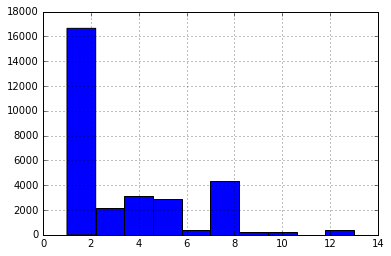

In [15]:
aposV6007.V6007.hist()

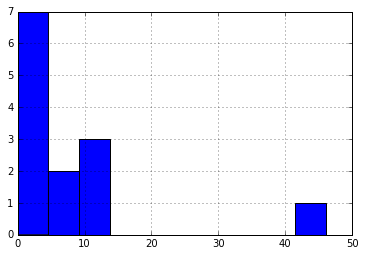

In [16]:
tb1.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x2070bafbeb8>],
 'caps': [<matplotlib.lines.Line2D at 0x2070bbdf978>,
 'fliers': [<matplotlib.lines.Line2D at 0x2070bba8b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2070bba82e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2070bbb1908>,
  <matplotlib.lines.Line2D at 0x2070bbb1a20>]}

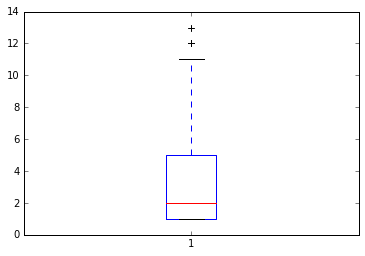

In [17]:
plt.boxplot(list(aposV6007.V6007))

In [18]:
#Idade com que comecou a trabalhar
aposV9892 =apos[~apos.V9892.isnull()]
n9892 = aposV9892.shape[0]
n9892

10051

In [19]:
tb2 = (aposV9892.V9892.value_counts()/n9892*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [20]:
faixas = (0, 5, 10, 15, 20, 25, 30)

**Legenda**
Valores representam a idade em que os entrevistados começara a trabalhar, na faixa de 4 a 30 anos.

In [21]:
#tb2.plot(kind='pie')

In [22]:
#tb2.plot(kind='bar')

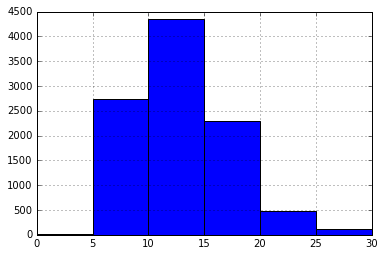

In [23]:
aposV9892.V9892.hist(bins=faixas)

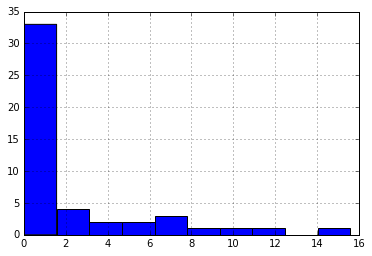

In [24]:
tb2.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x2070bb2f630>],
 'caps': [<matplotlib.lines.Line2D at 0x2070bb529e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2070bb2c9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2070bb5da58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2070bb2ff98>,
  <matplotlib.lines.Line2D at 0x2070bb528d0>]}

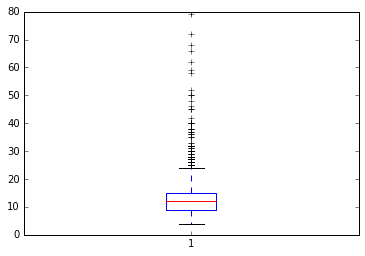

In [25]:
plt.boxplot(list(aposV9892.V9892))

In [26]:
aposV9892.V9892.mean()

12.498258879713461

In [27]:
aposV9892.V9892.median()

12.0

In [28]:
aposV9892.V9892.mode()

0    10.0
dtype: float64

In [29]:
aposV9892.V9892.var()

23.433902440834633

In [30]:
#Recebia normalmente rendimento que não era proveniente de trabalho 
#aposV9124 = apos[~apos.V9124.isnull()]
#n9124 = aposV9124.shape[0]
#n9124

In [31]:
#tb3 = (aposV9124.V9124.value_counts()/n9124*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [32]:
#Recebia rendimento de aposentado federal
aposV1251 = apos[~apos.V1251.isnull()]
n1251 = aposV1251.shape[0]
n1251

37506

In [33]:
tb4 = (aposV1251.V1251.value_counts()/n1251*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [34]:
#tb4.plot(kind='pie')

In [35]:
#tb4.plot(kind='bar')

In [36]:
#Recebia rendimento de outro fundo de aposentadoria
#aposV1257 = apos[~apos.V1257.isnull()]
#n1257 = aposV1257.shape[0]
#n1257

In [37]:
#tb5 = (aposV1257.V1257.value_counts()/n1257*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [38]:
#Recebia rendimento de aluguel
#aposV1266 = apos[~apos.V1266.isnull()]
#n1266 = aposV1266.shape[0]
#n1266

In [39]:
#tb6 = (aposV1266.V1266.value_counts()/n1266*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [40]:
#Anos de estudo
aposV4803 = apos[~apos.V4803.isnull()]
n4803 = aposV4803.shape[0]
n4803

37506

In [41]:
tb7 = (aposV4803.V4803.value_counts()/n4803*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

**Legenda**
Anos de estudo dos entrevistados.

01	Sem instrução e menos de 1 ano
02	1 ano
03	2 anos
04	3 anos
05	4 anos
06	5 anos
07	6 anos
08	7 anos
09	8 anos
10	9 anos
11	10 anos
12	11 anos
13	12 anos
14	13 anos
15	14 anos
16	15 anos ou mais
17	Não determinados 


In [42]:
#tb7.plot(kind='pie')

In [43]:
#tb7.plot(kind='bar')

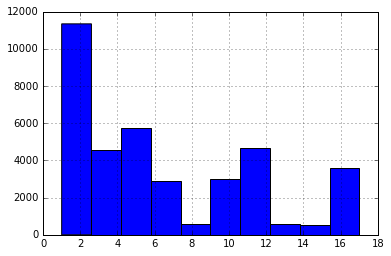

In [44]:
aposV4803.V4803.hist()

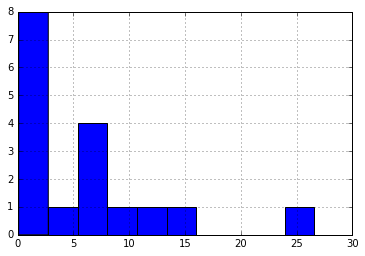

In [45]:
tb7.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x20704df60b8>],
 'caps': [<matplotlib.lines.Line2D at 0x20704dfab38>,
 'fliers': [<matplotlib.lines.Line2D at 0x20704e00cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x20704e004a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x20704df6ac8>,
  <matplotlib.lines.Line2D at 0x20704df6be0>]}

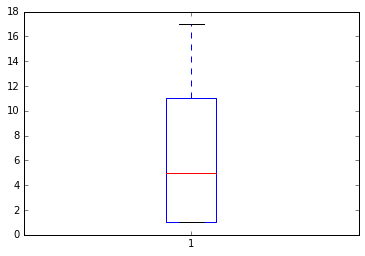

In [46]:
plt.boxplot(list(aposV4803.V4803))

In [47]:
aposV4803.V4803.mode() #Esse valor faz sentido porque os dados estão agrupados por faixas.

0    1
dtype: int64

In [48]:
#Nível de intrucao mais elevado
aposV4745 = apos[~apos.V4745.isnull()]
n4745 = aposV4745.shape[0]
n4745

37506

In [49]:
tb8 = (aposV4745.V4745.value_counts()/n4745*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

**Legenda**
Nível de instrução mais elevado alcançado pelos entrevistados.

1	Sem instrução
2	Fundamental incompleto ou equivalente
3	Fundamental completo ou equivalente
4	Médio incompleto ou equivalente
5	Médio completo ou equivalente
6	Superior incompleto ou equivalente
7	Superior completo 
8	Não determinado


In [50]:
#tb8.plot(kind='pie')

In [51]:
#tb8.plot(kind='bar')

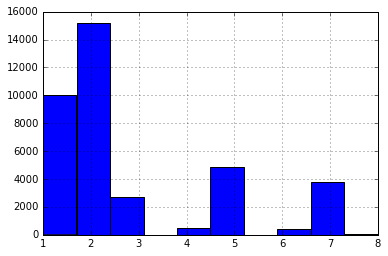

In [52]:
aposV4745.V4745.hist()

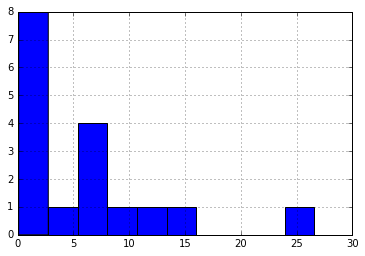

In [53]:
tb7.hist()

In [54]:
#plt.boxplot(list(aposV4745.V4745))

In [55]:
#aposV7127 = apos[~apos.V7127.isnull()]
#n7127 = aposV7127.shape[0]
#n7127

In [56]:
#Rendimento da aposentadoria da previdencia federal
aposV1252 = apos[(~apos.V1252.isnull()) & (apos.V1252!='999999999999')]
n1252 = aposV1252.shape[0]
n1252

36805

In [57]:
aposV1252['V1252'] = aposV1252.V1252.astype(float)

C:\Users\Avell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
tb13 = (aposV1252.V1252.value_counts()/n1252*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [59]:
aposV1252.V1252.median()

678.0

In [60]:
aposV1252.V1252.mean()

1285.3431055563103

In [61]:
aposV1252.V1252.mode()

0    678.0
dtype: float64

**Legenda**
Os valores representados mostram quais valores os aposentados recebem da previdecia federal.

In [62]:
#tb13.plot(kind='pie')

In [63]:
divisoes = (0, 1000, 2000, 3000, 4000, 5000, 6000)

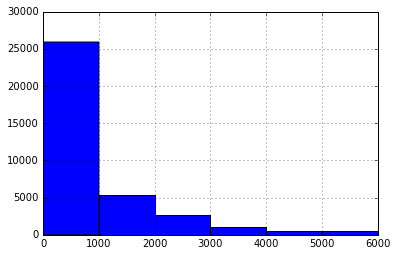

In [64]:
aposV1252.V1252.hist(bins=divisoes)

{'boxes': [<matplotlib.lines.Line2D at 0x2070d44e208>],
 'caps': [<matplotlib.lines.Line2D at 0x2070d454c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x2070d459e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2070d4595f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2070d44ec18>,
  <matplotlib.lines.Line2D at 0x2070d44ed30>]}

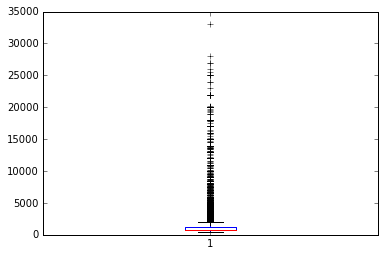

In [65]:
plt.boxplot(list(aposV1252.V1252))

In [66]:
#Rendimento de pensão da previdencia
aposV1255 = apos[(~apos.V1255.isnull()) & (apos.V1255!='999999999999') & (apos.V1255!='           .')]
n1255 = aposV1255.shape[0]
n1255

3489

In [67]:
aposV1255['V1255'] = aposV1255.V1255.astype(float)

C:\Users\Avell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
teste = pd.to_numeric(aposV1255.V1255)

In [69]:
aposV1255.V1255

474        678.0
477        678.0
503        900.0
542        678.0
664        678.0
862        678.0
1094       678.0
1121       678.0
1154       678.0
1164       678.0
1247       678.0
1323       678.0
1708       678.0
1783       320.0
1810       678.0
2251       678.0
2332       678.0
2599      1000.0
2723       678.0
2734       678.0
2737       678.0
3234      1200.0
3478      1300.0
3670      1500.0
4744       678.0
4841       678.0
4976       678.0
5069       678.0
5198       678.0
5614       678.0
           ...  
353733    2000.0
353897    2000.0
353956     670.0
354161     678.0
354265     678.0
354272     400.0
354280    8000.0
354515    1200.0
355329     678.0
355577     678.0
356126     678.0
356147     678.0
356161     678.0
356167     678.0
356780     850.0
357059     550.0
357811    1200.0
358213     679.0
359595    1600.0
359611     622.0
359637     700.0
359669     678.0
359716     678.0
359749    1900.0
360121    3500.0
360440     678.0
360971     678.0
361124    1200

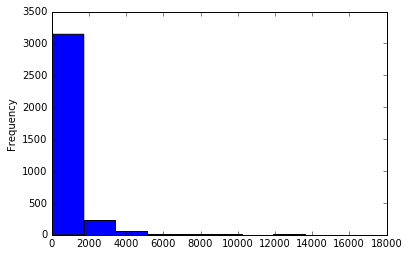

In [70]:
teste.plot(kind='hist')

In [71]:
tb14 = (aposV1255.V1255.value_counts()/n1255*100).round(decimals=1) #frequencia relativa dos dados da tabela, no caso da coluna

In [72]:
aposV1255.V1255.median()

678.0

In [73]:
aposV1255.V1255.mode()

0    678.0
dtype: float64

In [74]:
aposV1255.V1255.mean()

1032.0836916021783

In [75]:
divisoes1 = (0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000)

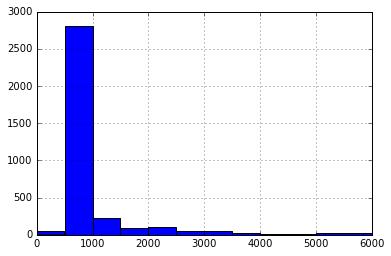

In [76]:
aposV1255.V1255.hist(bins=divisoes1)

In [77]:
#tb14.plot(kind='hist')

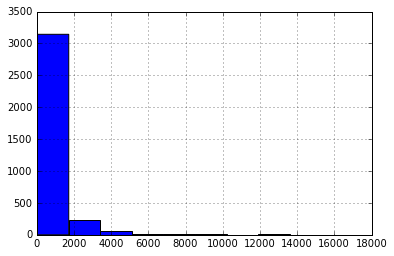

In [78]:
aposV1255.V1255.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x2070d5a54e0>],
 'caps': [<matplotlib.lines.Line2D at 0x2070d5b0f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x2070d5ba828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2070d5b58d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2070d5a5ef0>,
  <matplotlib.lines.Line2D at 0x2070d5b0748>]}

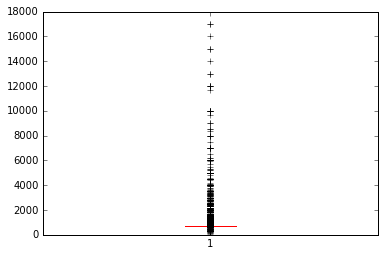

In [79]:
plt.boxplot(list(teste))

In [80]:
#apos9892v1252 = apos[(~apos.V9892.isnull()) & (~apos.V1252.isnull())]
#pp = pd.DataFrame()
#pp['V9892'] = aposV9892.V9892
#pp['V1252'] = aposV1252.V1252
#pp.plot(kind="scatter", x='V9892', y='V1252') #grafico de dispersão

In [81]:
cr = pd.crosstab(tb2, tb13)
tb13.describe()

count    1012.000000
mean        0.093281
std         1.918981
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.800000
Name: V1252, dtype: float64

In [82]:
#Tabela pivot das variaveis V9892(Idade com que comecou a trabalhar), e V1252(Renda da aposentadoria federal).
apos9892v1252 = apos[(~apos.V9892.isnull()) & (~apos.V1252.isnull()) & (apos.V1252!='999999999999')]
apos9892v1252['V1252'] = apos9892v1252.V1252.astype(float)

pivot1 = apos9892v1252.pivot_table(values=["V9892"], index=["V1252"], aggfunc=np.mean)
pivot1

C:\Users\Avell\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,V9892
V1252,
600.0,11.200000
620.0,6.000000
622.0,17.000000
630.0,10.500000
650.0,11.000000
660.0,12.000000
665.0,6.000000
668.0,11.333333
670.0,13.000000


In [83]:
apos9892v1255 = apos[(~apos.V9892.isnull()) & (~apos.V1255.isnull()) & (apos.V1255!='999999999999') & (apos.V1255!='           .')]
#apos9892v1255['V1255'] = apos9892v1255.V1255.astype(float)
teste = pd.to_numeric(apos9892v1255.V1255)

pivot2 = apos9892v1252.pivot_table(values=["V9892"], index=["V1255"], aggfunc=np.mean)
pivot2

,V9892
V1255,
.,12.499355
000000000145,12.000000
000000000210,12.000000
000000000300,9.500000
000000000339,8.000000
000000000340,10.000000
000000000410,12.000000
000000000440,12.000000
000000000622,31.000000


In [84]:
#Tabela pivot das variaveis V4083(Anos de estudo) e V1252(Rendimento da aposentadoria federal)
apos4803v1252 = apos[(~apos.V4803.isnull()) & (~apos.V1252.isnull()) & (apos.V1252!='999999999999')]
#apos4803v1252.shape[0]
apos4803v1252['V1252'] = apos4803v1252.V1252.astype(float)

C:\Users\Avell\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
pivot3 = apos4803v1252.pivot_table(values=["V4803"], index=["V1252"], aggfunc=np.mean)
pivot3

,V4803
V1252,
465.0,12.000000
480.0,12.000000
500.0,5.000000
580.0,5.000000
600.0,5.296296
605.0,1.000000
620.0,3.714286
622.0,4.000000
625.0,2.000000


In [86]:
aposV9892.V9892.cov(aposV1252.V1252) #Covariancia das variaveis V9892(Idade com que começou a trabalhar) e V1252(Renda da aposentadoria federal).

1718.1762498516134

In [87]:
r= aposV9892.V9892.mean() - aposV9892.V9892
r.sum()

-3.007869509019656e-10

In [88]:
aposV9892.V9892.corr(aposV1252.V1252) #Correlação das variaveis V9892(Idade com que começou a trabalhar) e V1252(Renda da aposentadoria federal).

0.23332462271301038

In [89]:
aposV9892.V9892.cov(aposV1255.V1255) #Covariancia das variaveis V9892(Idade com que começou a trabalhar) e V1255(Renda da pensão federal).

762.53685192243222

In [90]:
aposV9892.V9892.corr(aposV1255.V1255) #Correlação das variaveis V9892(Idade com que começou a trabalhar) e V1255(Renda da pensão federal).

0.20573792572213701

In [91]:
aposV4803.V4803.cov(aposV1252.V1252) #Covariancia das variaveis V4803(Anos de estudo) e V1252(Renda da aposentadoria).

3926.3059373991432

In [92]:
aposV4803.V4803.corr(aposV1252.V1252) #Correlação das variaveis V4803(Anos de estudo) e V1252(Renda da aposentadoria federal).

0.46624937981800463

In [93]:
pd.crosstab(aposV4803.V4803, aposV1252.V1252)

V1252,465.0,480.0,500.0,580.0,600.0,605.0,620.0,622.0,625.0,630.0,...,20170.0,22000.0,23000.0,24000.0,25000.0,25480.0,26000.0,27000.0,28000.0,33000.0
V4803,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,9,1,5,5,2,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
aposV4803.V4803.cov(aposV1255.V1255) #Covariancia das variaveis V4803(Anos de estudo) e V1255(Renda da pensão).

2367.0611709540603

In [95]:
aposV4803.V4803.corr(aposV1255.V1255) #Correlação das variaveis V4803(Anos de estudo) e V1255(Renda da pensão).

0.42084296305203894

In [96]:
aposV6007.V6007.cov(aposV1252.V1252) #Covariancia das variaveis V6007(Curso mais elevado que frequentou anteriormente) e V1252(Renda da aposentadoria).

1958.9608829591

In [97]:
aposV6007.V6007.corr(aposV1252.V1252) #Correlação das variaveis V6007(Curso mais elevado que frequentou anteriormente) e V1252(Renda da aposentadoria).

0.3806735890792956

In [98]:
aposV6007.V6007.corr(aposV1255.V1255) #Correlação das variaveis V6007(Curso mais elevado que frequentou anteriormente) e V1255(Renda da pensão).

0.28475718778727577

In [99]:
aposV6007.V6007.cov(aposV1255.V1255) #Covariancia das variaveis V6007(Curso mais elevado que frequentou anteriormente) e V1255(Renda da pensão).

1087.1715010144446

In [100]:
pd.crosstab(V6007, V9892)

V9892,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,...,57.0,58.0,59.0,60.0,61.0,62.0,66.0,68.0,79.0,80.0
V6007,,,,,,,,,,,,,,,,,,,,,
1.0,6,123,229,962,1360,1002,2216,516,1828,757,...,1,1,0,2,0,1,1,1,1,1
2.0,0,22,27,86,138,117,282,69,291,177,...,0,0,1,1,1,0,0,0,0,0
3.0,1,6,10,23,49,45,79,34,105,74,...,0,0,0,0,0,0,1,0,0,0
4.0,11,151,295,1244,2159,1983,5043,1675,5840,3549,...,1,1,0,1,0,0,0,0,0,0
5.0,9,86,164,611,1006,953,2410,1047,3808,2980,...,1,1,0,0,0,0,0,0,0,0
6.0,0,12,33,74,107,80,202,66,189,97,...,0,0,0,0,0,0,0,0,0,0
7.0,1,9,15,79,70,70,186,57,273,171,...,0,0,0,0,0,0,0,0,0,0
8.0,4,27,40,169,259,272,501,287,1007,852,...,0,0,0,1,0,0,1,0,0,0
9.0,0,2,1,7,4,11,14,9,35,30,...,0,0,0,0,0,0,0,0,0,0


In [101]:
aposV6007.V6007.corr(aposV9892.V9892) #Correlação das variaveis V6007(Curso mais elevado que frequentou anteriormente) e V9892(Idade com que começou a trabalhar).

0.29540553979984774

In [102]:
aposV4745.V4745.cov(aposV1252.V1252) #Covariancia das variaveis V4745(Nível de intrucao mais elevado) e V1252(Rendimento mensal da aposentadoria federal).

1605.0245470599905

In [103]:
aposV4745.V4745.corr(aposV1252.V1252) #Correlação das variaveis V4745(Nível de intrucao mais elevado) e V1252(Rendimento mensal da aposentadoria federal).

0.49491590826240195

In [104]:
aposV4745.V4745.cov(aposV1255.V1255) #Covariancia das variaveis V4745(Nível de intrucao mais elevado) e V1255(Rendimento mensal da pensão federal).

935.7658160904125

In [105]:
aposV4745.V4745.corr(aposV1255.V1255) #Correlação das variaveis V4745(Nível de intrucao mais elevado) e V1255(Rendimento mensal da pensão federal).

0.444111220350354

In [106]:
aposV4745.V4745.cov(aposV9892.V9892)

4.2203416209174005

In [107]:
aposV4745.V4745.corr(aposV9892.V9892)

0.43253865479885906

    Assim como foi descrito no início, esta análise tinha como objetivo comprovar ou não a influencia de fatores como a idade com que o indivíduo começou a trabalhar, na sua renda de aposentado. Isto foi feito com a observação de outros fatores que poderiam influenciar na renda de um aposentado, como a quantidade de anos de estudo e seu nível de educação, partindo do principio que desta forma o indivíduo teria maiores oportunidades profissionais, alcançando tetos salariais mais altos que proporcionam aposentadorias mais fartas.
    Através da análise numérica e gráfica realizada  acima, pode-se observar que os resultados obtidos diferem das expectativas iniciais. Foram obtidos valores de correlação na faixa de 0.29 até 0.49, isso representa valores baixos de relação entre as variaveis. Porém ao considerarmos a quantidade de pessoas analisadas nesta pesquisa, que gira em torno de 360.000, uma correlação, nos melhores casos, na casa de 0.49 é represativa dado o número expressivo de indivíduos envolvidos.
    Portanto, através da análise podemos dizer que existe uma relação consideravel entre as variaveis descritas.